Import các thư viên cần thiết


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from numpy import array

MBB Bank Data

In [10]:
# 2. Đọc file csv và gắn index với giá Price
df = pd.read_csv('../Dataset/MBB_Historical_Data.csv')
df1=df.reset_index()['Price']

In [11]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1) + 1)

train_data = df1[:train_size]
test_data = df1[train_size:]

In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\DeskTop_Linh04\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0977
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0128
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0046
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0016
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 7.9679e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 5.1541e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 5.0254e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.0202e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 5.7483e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 4.4116e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 4.5082e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 5.0251e-04
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 5.2217e-04
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 4.2920e-04
Epoch 15/100
17/1

In [19]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [20]:
# 11. Chuẩn hóa dữ liệu y_pred,
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [21]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 23162.03455760576


In [27]:
def forcast_30Day():
    x_input=test_data[40:].reshape(1,-1)
    x_input.shape
    print(x_input.size)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps= 92
    i=0
    while(i<30):

        if(len(temp_input)> 92):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    # 14.Vẽ hình 
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))

    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))

    prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
    plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

    plt.legend(['Train','Test','Predict','Predict30days'])
    plt.show()

In [29]:
def forcast_60Day():
    x_input=test_data[40:].reshape(1,-1)
    x_input.shape
    print(x_input.size)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps= 92
    i=0
    while(i<60):

        if(len(temp_input)> 92):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    # 14.Vẽ hình 
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))

    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))

    prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
    plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

    plt.legend(['Train','Test','Predict','Predict60days'])
    plt.show() 

In [33]:
def forcast_90Day():
    x_input=test_data[40:].reshape(1,-1)
    x_input.shape
    print(x_input.size)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps= 92
    i=0
    while(i<90):

        if(len(temp_input)> 92):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    # 14.Vẽ hình 
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))

    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))

    prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
    plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

    plt.legend(['Train','Test','Predict','Predict90days'])
    plt.show()

92
[0.69282466]
93
1 day input [0.49855313 0.50311042 0.50539373 0.50311042 0.50995103 0.51451298
 0.52362757 0.53730877 0.58062171 0.59886021 0.60797946 0.6148154
 0.61709871 0.60570081 0.63761585 0.64217315 0.6444518  0.6444518
 0.65357105 0.6695309  0.67180954 0.66496894 0.6626903  0.6626903
 0.66725225 0.67408819 0.67180954 0.65584969 0.6626903  0.65584969
 0.71056519 0.71512248 0.73563963 0.76527602 0.75844008 0.75615677
 0.75159948 0.75844008 0.75615677 0.75387813 0.75844008 0.76983798
 0.77667392 0.76527602 0.75844008 0.76755467 0.78579317 0.78579317
 0.77667392 0.74020158 0.71056519 0.71740113 0.75159948 0.73336098
 0.74932083 0.72196308 0.72196308 0.76527602 0.79263377 0.80631032
 0.79035512 0.81542956 0.81770821 0.82682746 0.82227017 0.79947437
 0.79491242 0.76755467 0.74932083 0.72880369 0.73563963 0.75844008
 0.74932083 0.74703753 0.78807182 0.73108233 0.75387813 0.71740113
 0.69916729 0.69460534 0.66725225 0.69232669 0.67865015 0.67865015
 0.68548609 0.68548609 0.70828654 

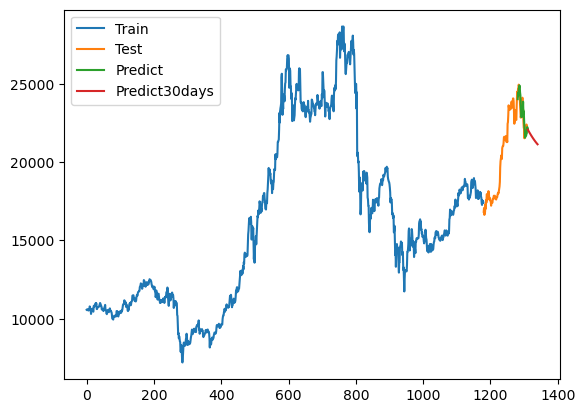

In [28]:
forcast_30Day()

92
[0.69282466]
93
1 day input [0.49855313 0.50311042 0.50539373 0.50311042 0.50995103 0.51451298
 0.52362757 0.53730877 0.58062171 0.59886021 0.60797946 0.6148154
 0.61709871 0.60570081 0.63761585 0.64217315 0.6444518  0.6444518
 0.65357105 0.6695309  0.67180954 0.66496894 0.6626903  0.6626903
 0.66725225 0.67408819 0.67180954 0.65584969 0.6626903  0.65584969
 0.71056519 0.71512248 0.73563963 0.76527602 0.75844008 0.75615677
 0.75159948 0.75844008 0.75615677 0.75387813 0.75844008 0.76983798
 0.77667392 0.76527602 0.75844008 0.76755467 0.78579317 0.78579317
 0.77667392 0.74020158 0.71056519 0.71740113 0.75159948 0.73336098
 0.74932083 0.72196308 0.72196308 0.76527602 0.79263377 0.80631032
 0.79035512 0.81542956 0.81770821 0.82682746 0.82227017 0.79947437
 0.79491242 0.76755467 0.74932083 0.72880369 0.73563963 0.75844008
 0.74932083 0.74703753 0.78807182 0.73108233 0.75387813 0.71740113
 0.69916729 0.69460534 0.66725225 0.69232669 0.67865015 0.67865015
 0.68548609 0.68548609 0.70828654 

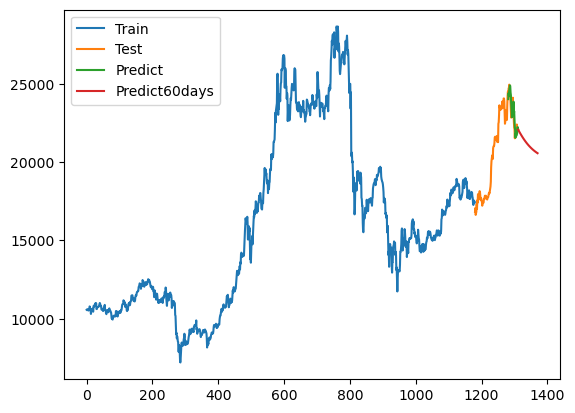

In [31]:
forcast_60Day()

92
[0.69282466]
93
1 day input [0.49855313 0.50311042 0.50539373 0.50311042 0.50995103 0.51451298
 0.52362757 0.53730877 0.58062171 0.59886021 0.60797946 0.6148154
 0.61709871 0.60570081 0.63761585 0.64217315 0.6444518  0.6444518
 0.65357105 0.6695309  0.67180954 0.66496894 0.6626903  0.6626903
 0.66725225 0.67408819 0.67180954 0.65584969 0.6626903  0.65584969
 0.71056519 0.71512248 0.73563963 0.76527602 0.75844008 0.75615677
 0.75159948 0.75844008 0.75615677 0.75387813 0.75844008 0.76983798
 0.77667392 0.76527602 0.75844008 0.76755467 0.78579317 0.78579317
 0.77667392 0.74020158 0.71056519 0.71740113 0.75159948 0.73336098
 0.74932083 0.72196308 0.72196308 0.76527602 0.79263377 0.80631032
 0.79035512 0.81542956 0.81770821 0.82682746 0.82227017 0.79947437
 0.79491242 0.76755467 0.74932083 0.72880369 0.73563963 0.75844008
 0.74932083 0.74703753 0.78807182 0.73108233 0.75387813 0.71740113
 0.69916729 0.69460534 0.66725225 0.69232669 0.67865015 0.67865015
 0.68548609 0.68548609 0.70828654 

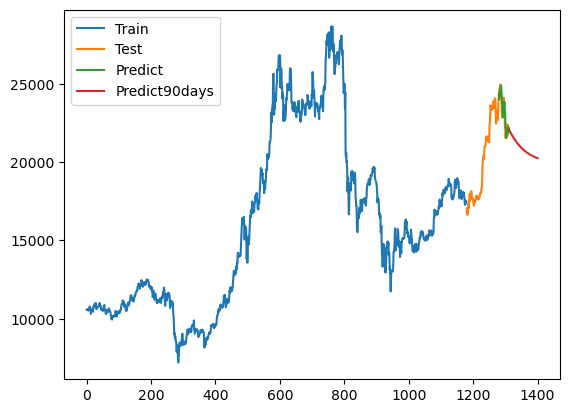

In [34]:
forcast_90Day()

MBB Data 8:2

In [35]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1) + 1)

train_data = df1[:train_size]
test_data = df1[train_size:]

In [36]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 3.6019e-04
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 3.9440e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 3.3634e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 4.3183e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 3.5518e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 4.0703e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 3.4786e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 3.7335e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3.9261e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 4.2967e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 3.8970e-04
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 3.8442e-04
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 3.4807e-04
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 3.4266e-04
E

In [39]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [40]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [41]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 20322.16198476857


In [42]:
def forcast_30Day_8():
    x_input=test_data[170:].reshape(1,-1)
    x_input.shape
    print(x_input.size)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps= 92
    i=0
    while(i<30):

        if(len(temp_input)> 92):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    # 14.Vẽ hình 
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))

    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))

    prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
    plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

    plt.legend(['Train','Test','Predict','Predict30days'])
    plt.show()

In [47]:
def forcast_60Day_8():
    x_input=test_data[170:].reshape(1,-1)
    x_input.shape
    print(x_input.size)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps= 92
    i=0
    while(i<60):

        if(len(temp_input)> 92):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    # 14.Vẽ hình 
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))

    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))

    prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
    plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

    plt.legend(['Train','Test','Predict','Predict60days'])
    plt.show()

In [44]:
def forcast_90Day_8():
    x_input=test_data[170:].reshape(1,-1)
    x_input.shape
    print(x_input.size)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps= 92
    i=0
    while(i<90):

        if(len(temp_input)> 92):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    # 14.Vẽ hình 
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))

    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))

    prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
    plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

    plt.legend(['Train','Test','Predict','Predict90days'])
    plt.show()

93
0 day input [0.49171253 0.49855313 0.50311042 0.50539373 0.50311042 0.50995103
 0.51451298 0.52362757 0.53730877 0.58062171 0.59886021 0.60797946
 0.6148154  0.61709871 0.60570081 0.63761585 0.64217315 0.6444518
 0.6444518  0.65357105 0.6695309  0.67180954 0.66496894 0.6626903
 0.6626903  0.66725225 0.67408819 0.67180954 0.65584969 0.6626903
 0.65584969 0.71056519 0.71512248 0.73563963 0.76527602 0.75844008
 0.75615677 0.75159948 0.75844008 0.75615677 0.75387813 0.75844008
 0.76983798 0.77667392 0.76527602 0.75844008 0.76755467 0.78579317
 0.78579317 0.77667392 0.74020158 0.71056519 0.71740113 0.75159948
 0.73336098 0.74932083 0.72196308 0.72196308 0.76527602 0.79263377
 0.80631032 0.79035512 0.81542956 0.81770821 0.82682746 0.82227017
 0.79947437 0.79491242 0.76755467 0.74932083 0.72880369 0.73563963
 0.75844008 0.74932083 0.74703753 0.78807182 0.73108233 0.75387813
 0.71740113 0.69916729 0.69460534 0.66725225 0.69232669 0.67865015
 0.67865015 0.68548609 0.68548609 0.70828654 0.701

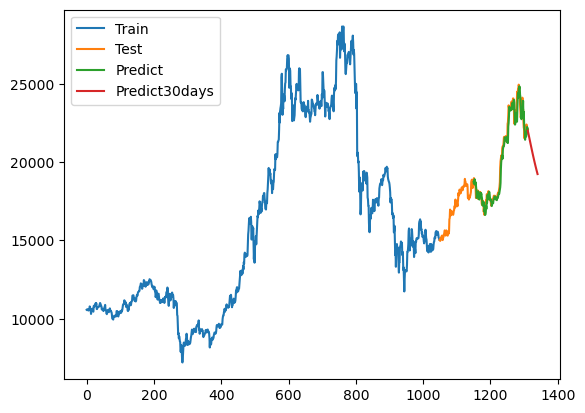

In [45]:
forcast_30Day_8()

93
0 day input [0.49171253 0.49855313 0.50311042 0.50539373 0.50311042 0.50995103
 0.51451298 0.52362757 0.53730877 0.58062171 0.59886021 0.60797946
 0.6148154  0.61709871 0.60570081 0.63761585 0.64217315 0.6444518
 0.6444518  0.65357105 0.6695309  0.67180954 0.66496894 0.6626903
 0.6626903  0.66725225 0.67408819 0.67180954 0.65584969 0.6626903
 0.65584969 0.71056519 0.71512248 0.73563963 0.76527602 0.75844008
 0.75615677 0.75159948 0.75844008 0.75615677 0.75387813 0.75844008
 0.76983798 0.77667392 0.76527602 0.75844008 0.76755467 0.78579317
 0.78579317 0.77667392 0.74020158 0.71056519 0.71740113 0.75159948
 0.73336098 0.74932083 0.72196308 0.72196308 0.76527602 0.79263377
 0.80631032 0.79035512 0.81542956 0.81770821 0.82682746 0.82227017
 0.79947437 0.79491242 0.76755467 0.74932083 0.72880369 0.73563963
 0.75844008 0.74932083 0.74703753 0.78807182 0.73108233 0.75387813
 0.71740113 0.69916729 0.69460534 0.66725225 0.69232669 0.67865015
 0.67865015 0.68548609 0.68548609 0.70828654 0.701

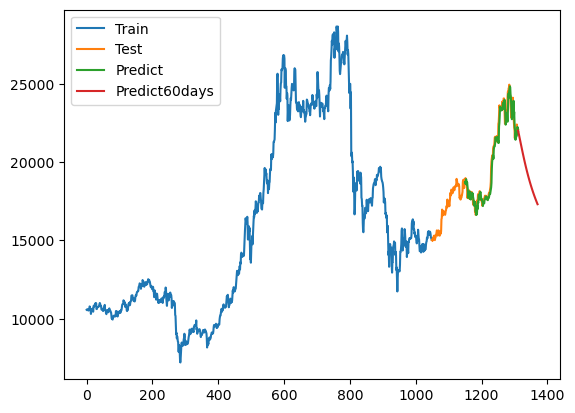

In [48]:
forcast_60Day_8()

93
0 day input [0.49171253 0.49855313 0.50311042 0.50539373 0.50311042 0.50995103
 0.51451298 0.52362757 0.53730877 0.58062171 0.59886021 0.60797946
 0.6148154  0.61709871 0.60570081 0.63761585 0.64217315 0.6444518
 0.6444518  0.65357105 0.6695309  0.67180954 0.66496894 0.6626903
 0.6626903  0.66725225 0.67408819 0.67180954 0.65584969 0.6626903
 0.65584969 0.71056519 0.71512248 0.73563963 0.76527602 0.75844008
 0.75615677 0.75159948 0.75844008 0.75615677 0.75387813 0.75844008
 0.76983798 0.77667392 0.76527602 0.75844008 0.76755467 0.78579317
 0.78579317 0.77667392 0.74020158 0.71056519 0.71740113 0.75159948
 0.73336098 0.74932083 0.72196308 0.72196308 0.76527602 0.79263377
 0.80631032 0.79035512 0.81542956 0.81770821 0.82682746 0.82227017
 0.79947437 0.79491242 0.76755467 0.74932083 0.72880369 0.73563963
 0.75844008 0.74932083 0.74703753 0.78807182 0.73108233 0.75387813
 0.71740113 0.69916729 0.69460534 0.66725225 0.69232669 0.67865015
 0.67865015 0.68548609 0.68548609 0.70828654 0.701

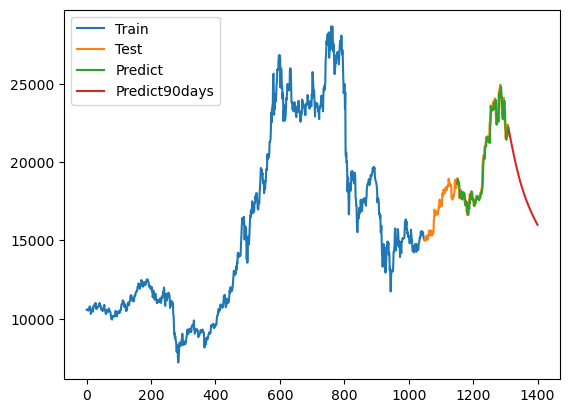

In [49]:
forcast_90Day_8()

MBB Data 7:3

In [50]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1) + 1)

train_data = df1[:train_size]
test_data = df1[train_size:]

In [51]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [52]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [53]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 3.2494e-04
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3.5386e-04
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 3.6956e-04
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3.7464e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 5.4660e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 4.4477e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 3.4368e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 3.3481e-04
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 3.3388e-04
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 2.8188e-04
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 2.9189e-04
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 3.1014e-04
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 3.6075e-04
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 3.1274e-04
E

In [54]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [55]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [56]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 18825.939528420033


In [57]:
def forcast_30Day_7():
    x_input=test_data[300:].reshape(1,-1)
    x_input.shape
    print(x_input.size)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps= 93
    i=0
    while(i<30):

        if(len(temp_input)> 93):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    # 14.Vẽ hình 
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))

    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))

    prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
    plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

    plt.legend(['Train','Test','Predict','Predict30days'])
    plt.show()

In [58]:
def forcast_60Day_7():
    x_input=test_data[300:].reshape(1,-1)
    x_input.shape
    print(x_input.size)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps= 93
    i=0
    while(i<60):

        if(len(temp_input)> 93):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    # 14.Vẽ hình 
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))

    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))

    prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
    plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

    plt.legend(['Train','Test','Predict','Predict60days'])
    plt.show()

In [59]:
def forcast_90Day_7():
    x_input=test_data[300:].reshape(1,-1)
    x_input.shape
    print(x_input.size)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps= 93
    i=0
    while(i<90):

        if(len(temp_input)> 93):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    # 14.Vẽ hình 
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,scaler.inverse_transform(test_data))

    test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_data_index,(y_pred))

    prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
    plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

    plt.legend(['Train','Test','Predict','Predict90days'])
    plt.show()

94
0 day input [0.49171253 0.49171253 0.49855313 0.50311042 0.50539373 0.50311042
 0.50995103 0.51451298 0.52362757 0.53730877 0.58062171 0.59886021
 0.60797946 0.6148154  0.61709871 0.60570081 0.63761585 0.64217315
 0.6444518  0.6444518  0.65357105 0.6695309  0.67180954 0.66496894
 0.6626903  0.6626903  0.66725225 0.67408819 0.67180954 0.65584969
 0.6626903  0.65584969 0.71056519 0.71512248 0.73563963 0.76527602
 0.75844008 0.75615677 0.75159948 0.75844008 0.75615677 0.75387813
 0.75844008 0.76983798 0.77667392 0.76527602 0.75844008 0.76755467
 0.78579317 0.78579317 0.77667392 0.74020158 0.71056519 0.71740113
 0.75159948 0.73336098 0.74932083 0.72196308 0.72196308 0.76527602
 0.79263377 0.80631032 0.79035512 0.81542956 0.81770821 0.82682746
 0.82227017 0.79947437 0.79491242 0.76755467 0.74932083 0.72880369
 0.73563963 0.75844008 0.74932083 0.74703753 0.78807182 0.73108233
 0.75387813 0.71740113 0.69916729 0.69460534 0.66725225 0.69232669
 0.67865015 0.67865015 0.68548609 0.68548609 0.

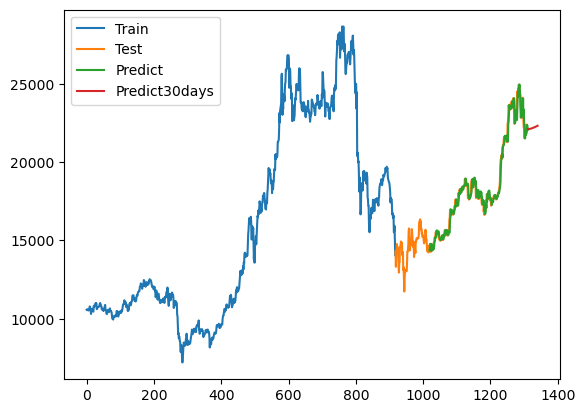

In [60]:
forcast_30Day_7()

94
0 day input [0.49171253 0.49171253 0.49855313 0.50311042 0.50539373 0.50311042
 0.50995103 0.51451298 0.52362757 0.53730877 0.58062171 0.59886021
 0.60797946 0.6148154  0.61709871 0.60570081 0.63761585 0.64217315
 0.6444518  0.6444518  0.65357105 0.6695309  0.67180954 0.66496894
 0.6626903  0.6626903  0.66725225 0.67408819 0.67180954 0.65584969
 0.6626903  0.65584969 0.71056519 0.71512248 0.73563963 0.76527602
 0.75844008 0.75615677 0.75159948 0.75844008 0.75615677 0.75387813
 0.75844008 0.76983798 0.77667392 0.76527602 0.75844008 0.76755467
 0.78579317 0.78579317 0.77667392 0.74020158 0.71056519 0.71740113
 0.75159948 0.73336098 0.74932083 0.72196308 0.72196308 0.76527602
 0.79263377 0.80631032 0.79035512 0.81542956 0.81770821 0.82682746
 0.82227017 0.79947437 0.79491242 0.76755467 0.74932083 0.72880369
 0.73563963 0.75844008 0.74932083 0.74703753 0.78807182 0.73108233
 0.75387813 0.71740113 0.69916729 0.69460534 0.66725225 0.69232669
 0.67865015 0.67865015 0.68548609 0.68548609 0.

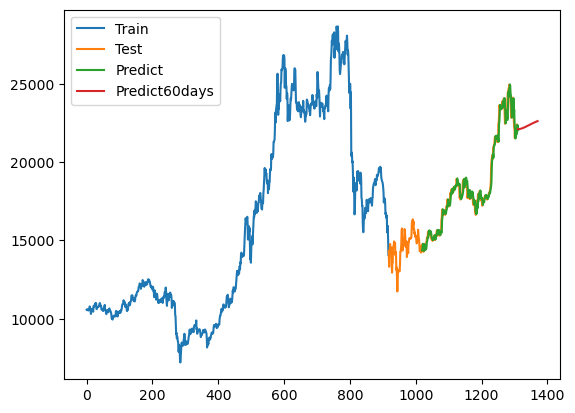

In [61]:
forcast_60Day_7()


94
0 day input [0.49171253 0.49171253 0.49855313 0.50311042 0.50539373 0.50311042
 0.50995103 0.51451298 0.52362757 0.53730877 0.58062171 0.59886021
 0.60797946 0.6148154  0.61709871 0.60570081 0.63761585 0.64217315
 0.6444518  0.6444518  0.65357105 0.6695309  0.67180954 0.66496894
 0.6626903  0.6626903  0.66725225 0.67408819 0.67180954 0.65584969
 0.6626903  0.65584969 0.71056519 0.71512248 0.73563963 0.76527602
 0.75844008 0.75615677 0.75159948 0.75844008 0.75615677 0.75387813
 0.75844008 0.76983798 0.77667392 0.76527602 0.75844008 0.76755467
 0.78579317 0.78579317 0.77667392 0.74020158 0.71056519 0.71740113
 0.75159948 0.73336098 0.74932083 0.72196308 0.72196308 0.76527602
 0.79263377 0.80631032 0.79035512 0.81542956 0.81770821 0.82682746
 0.82227017 0.79947437 0.79491242 0.76755467 0.74932083 0.72880369
 0.73563963 0.75844008 0.74932083 0.74703753 0.78807182 0.73108233
 0.75387813 0.71740113 0.69916729 0.69460534 0.66725225 0.69232669
 0.67865015 0.67865015 0.68548609 0.68548609 0.

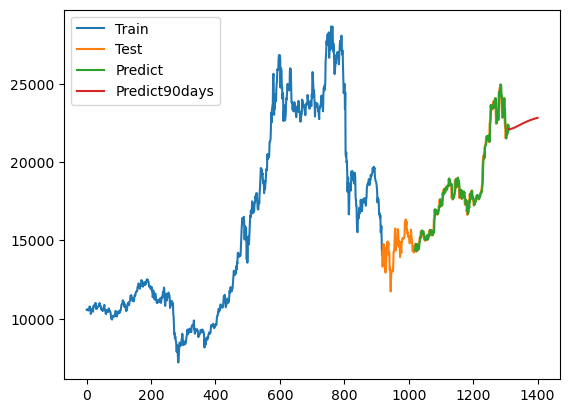

In [62]:
forcast_90Day_7()

<font size = 12>BID</font>

In [63]:
# 2. Đọc file csv và gắn index với giá Price
df = pd.read_csv('../Dataset/BID_Historical_Data.csv')
df1=df.reset_index()['Price']
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [64]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1) + 1)

train_data = df1[:train_size]
test_data = df1[train_size:]

In [65]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [66]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [67]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 6.4899e-04
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.2288e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 6.7365e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 6.2339e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.0773e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6.3730e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 6.4823e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6.3898e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 5.7838e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 5.9460e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.9802e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.5700e-04
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 6.3379e-04
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.0593e-04
E

In [68]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred,
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [69]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 50441.486633434804


92
[0.8080937]
93
1 day input [0.61427349 0.63848227 0.6320266  0.6320266  0.62234309 0.64493794
 0.6320266  0.65784929 0.65300754 0.68044415 0.74177305 0.73047562
 0.77405142 0.74500089 0.7288617  0.74822872 0.75791224 0.75629832
 0.77727926 0.85313342 0.8515195  0.83860816 0.82246897 0.80632979
 0.82408289 0.8160133  0.80794371 0.78373493 0.76920966 0.75791224
 0.81439938 0.81924114 0.82408289 0.82408289 0.81117154 0.83538032
 0.83860816 0.84990559 0.84990559 0.92253192 0.97417731 0.95481028
 0.98386082 0.95481028 0.97094947 0.97094947 1.         1.
 0.96449379 0.89348138 0.87411436 0.92253192 0.94189894 0.9128484
 0.92898759 0.92253192 0.90962057 0.95481028 0.95481028 0.99354433
 0.95481028 0.95481028 0.9386711  0.94189894 0.92575975 0.92575975
 0.91930408 0.89025355 0.89025355 0.86443085 0.88379787 0.94512677
 0.92253192 0.95481028 0.96772163 0.84829167 0.86765869 0.79664628
 0.80471587 0.86120301 0.83860816 0.85797518 0.84506383 0.83215248
 0.83215248 0.83215248 0.87411436 0.85797

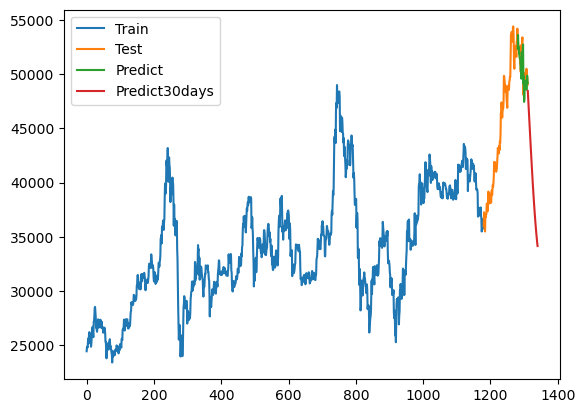

In [70]:
forcast_30Day()

92
[0.8080937]
93
1 day input [0.61427349 0.63848227 0.6320266  0.6320266  0.62234309 0.64493794
 0.6320266  0.65784929 0.65300754 0.68044415 0.74177305 0.73047562
 0.77405142 0.74500089 0.7288617  0.74822872 0.75791224 0.75629832
 0.77727926 0.85313342 0.8515195  0.83860816 0.82246897 0.80632979
 0.82408289 0.8160133  0.80794371 0.78373493 0.76920966 0.75791224
 0.81439938 0.81924114 0.82408289 0.82408289 0.81117154 0.83538032
 0.83860816 0.84990559 0.84990559 0.92253192 0.97417731 0.95481028
 0.98386082 0.95481028 0.97094947 0.97094947 1.         1.
 0.96449379 0.89348138 0.87411436 0.92253192 0.94189894 0.9128484
 0.92898759 0.92253192 0.90962057 0.95481028 0.95481028 0.99354433
 0.95481028 0.95481028 0.9386711  0.94189894 0.92575975 0.92575975
 0.91930408 0.89025355 0.89025355 0.86443085 0.88379787 0.94512677
 0.92253192 0.95481028 0.96772163 0.84829167 0.86765869 0.79664628
 0.80471587 0.86120301 0.83860816 0.85797518 0.84506383 0.83215248
 0.83215248 0.83215248 0.87411436 0.85797

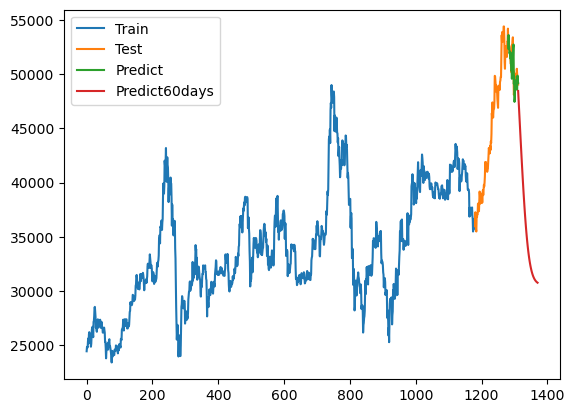

In [71]:
forcast_60Day()

92
[0.8080937]
93
1 day input [0.61427349 0.63848227 0.6320266  0.6320266  0.62234309 0.64493794
 0.6320266  0.65784929 0.65300754 0.68044415 0.74177305 0.73047562
 0.77405142 0.74500089 0.7288617  0.74822872 0.75791224 0.75629832
 0.77727926 0.85313342 0.8515195  0.83860816 0.82246897 0.80632979
 0.82408289 0.8160133  0.80794371 0.78373493 0.76920966 0.75791224
 0.81439938 0.81924114 0.82408289 0.82408289 0.81117154 0.83538032
 0.83860816 0.84990559 0.84990559 0.92253192 0.97417731 0.95481028
 0.98386082 0.95481028 0.97094947 0.97094947 1.         1.
 0.96449379 0.89348138 0.87411436 0.92253192 0.94189894 0.9128484
 0.92898759 0.92253192 0.90962057 0.95481028 0.95481028 0.99354433
 0.95481028 0.95481028 0.9386711  0.94189894 0.92575975 0.92575975
 0.91930408 0.89025355 0.89025355 0.86443085 0.88379787 0.94512677
 0.92253192 0.95481028 0.96772163 0.84829167 0.86765869 0.79664628
 0.80471587 0.86120301 0.83860816 0.85797518 0.84506383 0.83215248
 0.83215248 0.83215248 0.87411436 0.85797

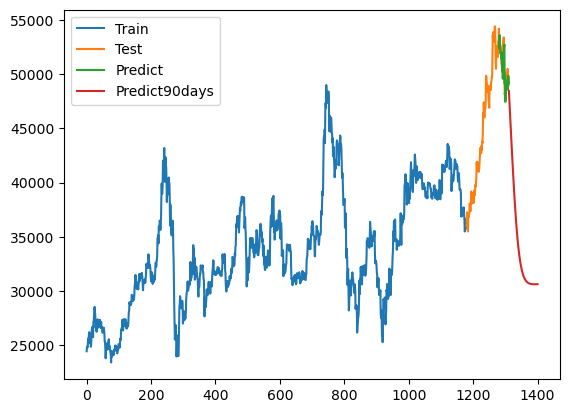

In [72]:
forcast_90Day()

BID 8:2

In [73]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1) + 1)

train_data = df1[:train_size]
test_data = df1[train_size:]
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [74]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 6.6764e-04
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 6.9438e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.5507e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 6.8143e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 6.9253e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 7.1520e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 6.9831e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 6.2453e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 6.5249e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 7.0844e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 6.5099e-04
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 6.1086e-04
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 6.8136e-04
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 6.9295e-04
E

In [75]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred,
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [76]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 45084.94463385004


93
0 day input [0.59329255 0.61427349 0.63848227 0.6320266  0.6320266  0.62234309
 0.64493794 0.6320266  0.65784929 0.65300754 0.68044415 0.74177305
 0.73047562 0.77405142 0.74500089 0.7288617  0.74822872 0.75791224
 0.75629832 0.77727926 0.85313342 0.8515195  0.83860816 0.82246897
 0.80632979 0.82408289 0.8160133  0.80794371 0.78373493 0.76920966
 0.75791224 0.81439938 0.81924114 0.82408289 0.82408289 0.81117154
 0.83538032 0.83860816 0.84990559 0.84990559 0.92253192 0.97417731
 0.95481028 0.98386082 0.95481028 0.97094947 0.97094947 1.
 1.         0.96449379 0.89348138 0.87411436 0.92253192 0.94189894
 0.9128484  0.92898759 0.92253192 0.90962057 0.95481028 0.95481028
 0.99354433 0.95481028 0.95481028 0.9386711  0.94189894 0.92575975
 0.92575975 0.91930408 0.89025355 0.89025355 0.86443085 0.88379787
 0.94512677 0.92253192 0.95481028 0.96772163 0.84829167 0.86765869
 0.79664628 0.80471587 0.86120301 0.83860816 0.85797518 0.84506383
 0.83215248 0.83215248 0.83215248 0.87411436 0.85797518

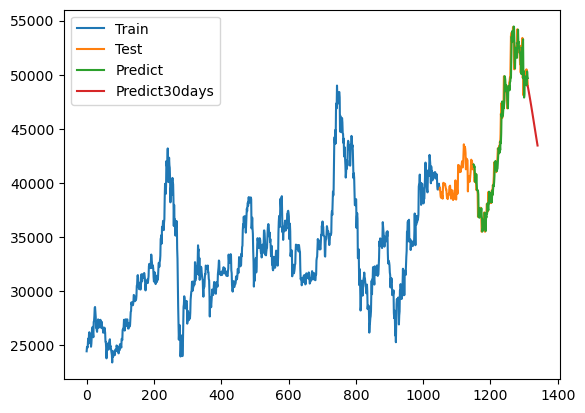

In [77]:
forcast_30Day_8()

93
0 day input [0.59329255 0.61427349 0.63848227 0.6320266  0.6320266  0.62234309
 0.64493794 0.6320266  0.65784929 0.65300754 0.68044415 0.74177305
 0.73047562 0.77405142 0.74500089 0.7288617  0.74822872 0.75791224
 0.75629832 0.77727926 0.85313342 0.8515195  0.83860816 0.82246897
 0.80632979 0.82408289 0.8160133  0.80794371 0.78373493 0.76920966
 0.75791224 0.81439938 0.81924114 0.82408289 0.82408289 0.81117154
 0.83538032 0.83860816 0.84990559 0.84990559 0.92253192 0.97417731
 0.95481028 0.98386082 0.95481028 0.97094947 0.97094947 1.
 1.         0.96449379 0.89348138 0.87411436 0.92253192 0.94189894
 0.9128484  0.92898759 0.92253192 0.90962057 0.95481028 0.95481028
 0.99354433 0.95481028 0.95481028 0.9386711  0.94189894 0.92575975
 0.92575975 0.91930408 0.89025355 0.89025355 0.86443085 0.88379787
 0.94512677 0.92253192 0.95481028 0.96772163 0.84829167 0.86765869
 0.79664628 0.80471587 0.86120301 0.83860816 0.85797518 0.84506383
 0.83215248 0.83215248 0.83215248 0.87411436 0.85797518

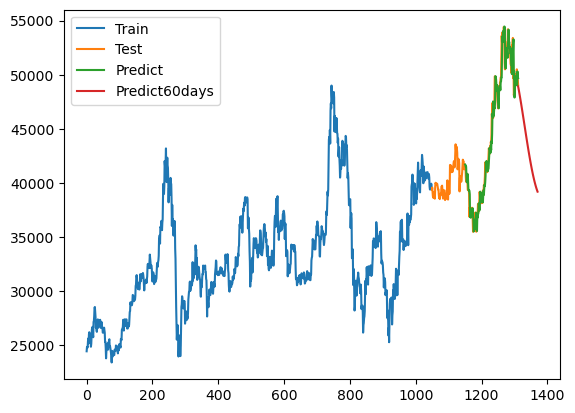

In [78]:
forcast_60Day_8()

93
0 day input [0.59329255 0.61427349 0.63848227 0.6320266  0.6320266  0.62234309
 0.64493794 0.6320266  0.65784929 0.65300754 0.68044415 0.74177305
 0.73047562 0.77405142 0.74500089 0.7288617  0.74822872 0.75791224
 0.75629832 0.77727926 0.85313342 0.8515195  0.83860816 0.82246897
 0.80632979 0.82408289 0.8160133  0.80794371 0.78373493 0.76920966
 0.75791224 0.81439938 0.81924114 0.82408289 0.82408289 0.81117154
 0.83538032 0.83860816 0.84990559 0.84990559 0.92253192 0.97417731
 0.95481028 0.98386082 0.95481028 0.97094947 0.97094947 1.
 1.         0.96449379 0.89348138 0.87411436 0.92253192 0.94189894
 0.9128484  0.92898759 0.92253192 0.90962057 0.95481028 0.95481028
 0.99354433 0.95481028 0.95481028 0.9386711  0.94189894 0.92575975
 0.92575975 0.91930408 0.89025355 0.89025355 0.86443085 0.88379787
 0.94512677 0.92253192 0.95481028 0.96772163 0.84829167 0.86765869
 0.79664628 0.80471587 0.86120301 0.83860816 0.85797518 0.84506383
 0.83215248 0.83215248 0.83215248 0.87411436 0.85797518

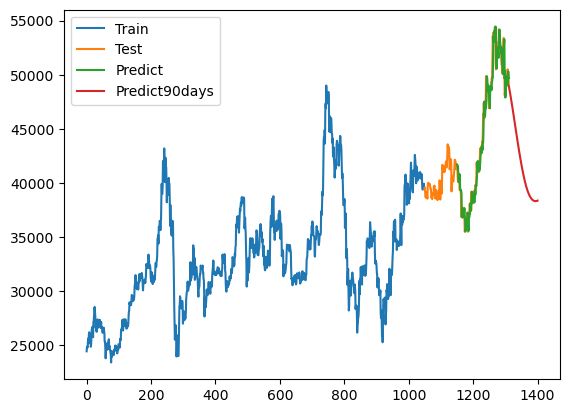

In [79]:
forcast_90Day_8()

BID 7:3

In [80]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1) + 1)

train_data = df1[:train_size]
test_data = df1[train_size:]
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [81]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 6.7366e-04
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 6.6791e-04
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 5.6653e-04
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 6.2012e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 5.6307e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 6.3774e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 5.9180e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 5.8704e-04
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 5.9912e-04
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 6.4685e-04
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 6.9481e-04
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 6.7499e-04
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 6.6138e-04
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 5.9811e-04
E

In [82]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [83]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 42968.234425289724


94
0 day input [0.57715337 0.59329255 0.61427349 0.63848227 0.6320266  0.6320266
 0.62234309 0.64493794 0.6320266  0.65784929 0.65300754 0.68044415
 0.74177305 0.73047562 0.77405142 0.74500089 0.7288617  0.74822872
 0.75791224 0.75629832 0.77727926 0.85313342 0.8515195  0.83860816
 0.82246897 0.80632979 0.82408289 0.8160133  0.80794371 0.78373493
 0.76920966 0.75791224 0.81439938 0.81924114 0.82408289 0.82408289
 0.81117154 0.83538032 0.83860816 0.84990559 0.84990559 0.92253192
 0.97417731 0.95481028 0.98386082 0.95481028 0.97094947 0.97094947
 1.         1.         0.96449379 0.89348138 0.87411436 0.92253192
 0.94189894 0.9128484  0.92898759 0.92253192 0.90962057 0.95481028
 0.95481028 0.99354433 0.95481028 0.95481028 0.9386711  0.94189894
 0.92575975 0.92575975 0.91930408 0.89025355 0.89025355 0.86443085
 0.88379787 0.94512677 0.92253192 0.95481028 0.96772163 0.84829167
 0.86765869 0.79664628 0.80471587 0.86120301 0.83860816 0.85797518
 0.84506383 0.83215248 0.83215248 0.83215248 0.8

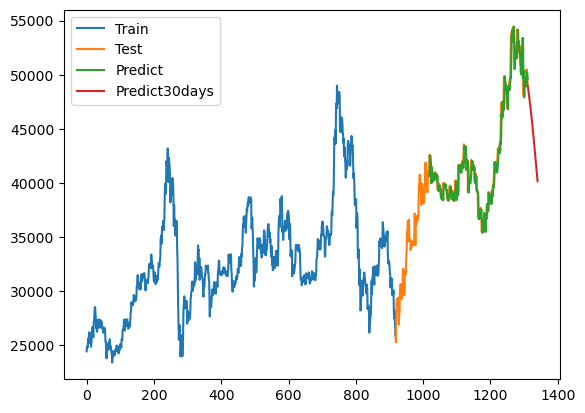

In [84]:
forcast_30Day_7()

94
0 day input [0.57715337 0.59329255 0.61427349 0.63848227 0.6320266  0.6320266
 0.62234309 0.64493794 0.6320266  0.65784929 0.65300754 0.68044415
 0.74177305 0.73047562 0.77405142 0.74500089 0.7288617  0.74822872
 0.75791224 0.75629832 0.77727926 0.85313342 0.8515195  0.83860816
 0.82246897 0.80632979 0.82408289 0.8160133  0.80794371 0.78373493
 0.76920966 0.75791224 0.81439938 0.81924114 0.82408289 0.82408289
 0.81117154 0.83538032 0.83860816 0.84990559 0.84990559 0.92253192
 0.97417731 0.95481028 0.98386082 0.95481028 0.97094947 0.97094947
 1.         1.         0.96449379 0.89348138 0.87411436 0.92253192
 0.94189894 0.9128484  0.92898759 0.92253192 0.90962057 0.95481028
 0.95481028 0.99354433 0.95481028 0.95481028 0.9386711  0.94189894
 0.92575975 0.92575975 0.91930408 0.89025355 0.89025355 0.86443085
 0.88379787 0.94512677 0.92253192 0.95481028 0.96772163 0.84829167
 0.86765869 0.79664628 0.80471587 0.86120301 0.83860816 0.85797518
 0.84506383 0.83215248 0.83215248 0.83215248 0.8

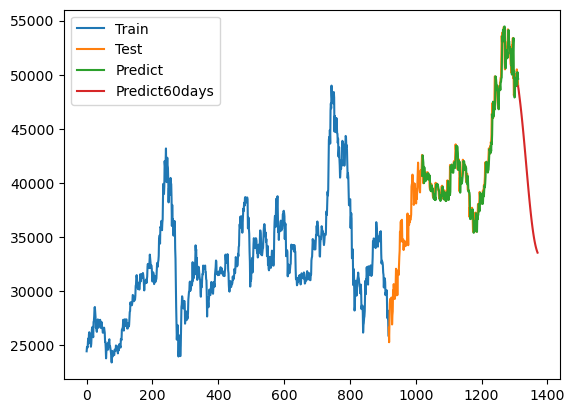

In [85]:
forcast_60Day_7()


94
0 day input [0.57715337 0.59329255 0.61427349 0.63848227 0.6320266  0.6320266
 0.62234309 0.64493794 0.6320266  0.65784929 0.65300754 0.68044415
 0.74177305 0.73047562 0.77405142 0.74500089 0.7288617  0.74822872
 0.75791224 0.75629832 0.77727926 0.85313342 0.8515195  0.83860816
 0.82246897 0.80632979 0.82408289 0.8160133  0.80794371 0.78373493
 0.76920966 0.75791224 0.81439938 0.81924114 0.82408289 0.82408289
 0.81117154 0.83538032 0.83860816 0.84990559 0.84990559 0.92253192
 0.97417731 0.95481028 0.98386082 0.95481028 0.97094947 0.97094947
 1.         1.         0.96449379 0.89348138 0.87411436 0.92253192
 0.94189894 0.9128484  0.92898759 0.92253192 0.90962057 0.95481028
 0.95481028 0.99354433 0.95481028 0.95481028 0.9386711  0.94189894
 0.92575975 0.92575975 0.91930408 0.89025355 0.89025355 0.86443085
 0.88379787 0.94512677 0.92253192 0.95481028 0.96772163 0.84829167
 0.86765869 0.79664628 0.80471587 0.86120301 0.83860816 0.85797518
 0.84506383 0.83215248 0.83215248 0.83215248 0.8

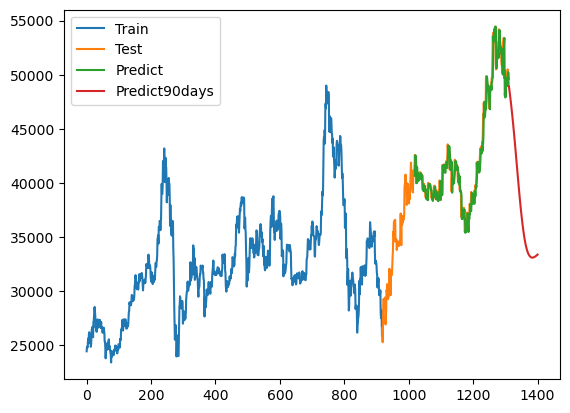

In [86]:
forcast_90Day_7()


<font size = 12 >VCB</font>

In [87]:
# 2. Đọc file csv và gắn index với giá Price
df = pd.read_csv('../Dataset/VCB_Historical_Data.csv')
df1=df.reset_index()['Price']
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

VCB 9:1

In [88]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1) + 1)

train_data = df1[:train_size]
test_data = df1[train_size:]
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [89]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 5.6725e-04
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 6.6320e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 6.1789e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 6.6233e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 5.8130e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 5.9835e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 5.8234e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 5.6015e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.0799e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 6.5411e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 5.4723e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.0740e-04
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 6.2802e-04
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.9919e-04
E

In [90]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [91]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 93215.16494007542


92
[0.89788055]
93
1 day input [0.6914446  0.70827489 0.72697522 0.72510519 0.72697522 0.6802244
 0.74006545 0.75876578 0.78494624 0.79055633 0.80177653 0.82047686
 0.85226741 0.84852735 0.83730715 0.86161758 0.86161758 0.87844787
 0.88218794 0.91023843 0.89901823 0.88966807 0.88218794 0.88031791
 0.89901823 0.88405797 0.88031791 0.83356709 0.85787751 0.86722768
 0.86161758 0.85226741 0.86161758 0.85974755 0.85413745 0.86535764
 0.885928   0.88405797 0.85226741 0.84104722 0.85226741 0.88218794
 1.         0.99812997 0.99812997 0.97381954 0.96446938 0.96633941
 0.97007948 0.95698925 0.93828892 0.94389902 0.97381954 0.95511921
 0.93641889 0.91771856 0.9083684  0.92145863 0.95885928 0.98129967
 0.96820944 0.97942964 0.97007948 0.96820944 0.95324918 0.95885928
 0.94576905 0.93267882 0.97381954 0.95324918 0.95324918 0.94202899
 0.94576905 0.93641889 0.94763908 0.89901823 0.88031791 0.87096774
 0.87096774 0.87283777 0.86348761 0.87283777 0.88031791 0.88405797
 0.8971482  0.9083684  0.9177185

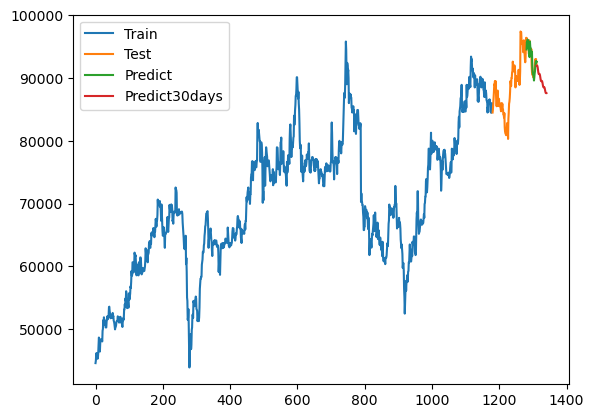

In [92]:
forcast_30Day()

92
[0.89788055]
93
1 day input [0.6914446  0.70827489 0.72697522 0.72510519 0.72697522 0.6802244
 0.74006545 0.75876578 0.78494624 0.79055633 0.80177653 0.82047686
 0.85226741 0.84852735 0.83730715 0.86161758 0.86161758 0.87844787
 0.88218794 0.91023843 0.89901823 0.88966807 0.88218794 0.88031791
 0.89901823 0.88405797 0.88031791 0.83356709 0.85787751 0.86722768
 0.86161758 0.85226741 0.86161758 0.85974755 0.85413745 0.86535764
 0.885928   0.88405797 0.85226741 0.84104722 0.85226741 0.88218794
 1.         0.99812997 0.99812997 0.97381954 0.96446938 0.96633941
 0.97007948 0.95698925 0.93828892 0.94389902 0.97381954 0.95511921
 0.93641889 0.91771856 0.9083684  0.92145863 0.95885928 0.98129967
 0.96820944 0.97942964 0.97007948 0.96820944 0.95324918 0.95885928
 0.94576905 0.93267882 0.97381954 0.95324918 0.95324918 0.94202899
 0.94576905 0.93641889 0.94763908 0.89901823 0.88031791 0.87096774
 0.87096774 0.87283777 0.86348761 0.87283777 0.88031791 0.88405797
 0.8971482  0.9083684  0.9177185

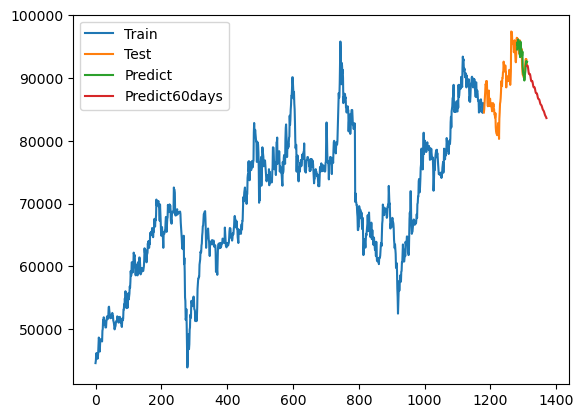

In [93]:
forcast_60Day()

92
[0.89788055]
93
1 day input [0.6914446  0.70827489 0.72697522 0.72510519 0.72697522 0.6802244
 0.74006545 0.75876578 0.78494624 0.79055633 0.80177653 0.82047686
 0.85226741 0.84852735 0.83730715 0.86161758 0.86161758 0.87844787
 0.88218794 0.91023843 0.89901823 0.88966807 0.88218794 0.88031791
 0.89901823 0.88405797 0.88031791 0.83356709 0.85787751 0.86722768
 0.86161758 0.85226741 0.86161758 0.85974755 0.85413745 0.86535764
 0.885928   0.88405797 0.85226741 0.84104722 0.85226741 0.88218794
 1.         0.99812997 0.99812997 0.97381954 0.96446938 0.96633941
 0.97007948 0.95698925 0.93828892 0.94389902 0.97381954 0.95511921
 0.93641889 0.91771856 0.9083684  0.92145863 0.95885928 0.98129967
 0.96820944 0.97942964 0.97007948 0.96820944 0.95324918 0.95885928
 0.94576905 0.93267882 0.97381954 0.95324918 0.95324918 0.94202899
 0.94576905 0.93641889 0.94763908 0.89901823 0.88031791 0.87096774
 0.87096774 0.87283777 0.86348761 0.87283777 0.88031791 0.88405797
 0.8971482  0.9083684  0.9177185

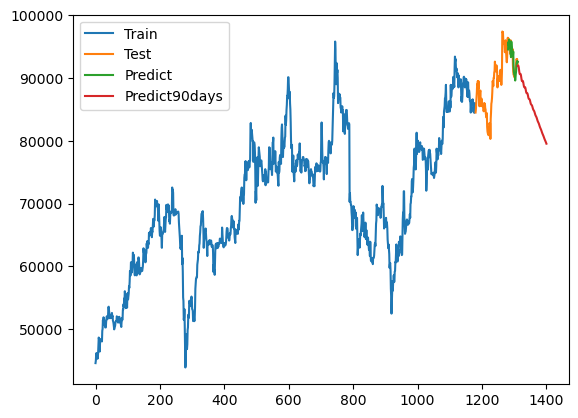

In [94]:
forcast_90Day()

VCB 8:2


In [95]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1) + 1)

train_data = df1[:train_size]
test_data = df1[train_size:]
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [96]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.8454e-04
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 6.3817e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.2108e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 5.9519e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 5.8758e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.0615e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.2247e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.8369e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 5.7159e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 5.8477e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 5.5726e-04
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 5.1859e-04
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 5.5921e-04
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 7.1699e-04
E

In [97]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [98]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 89055.06796553268


93
0 day input [0.6914446  0.6914446  0.70827489 0.72697522 0.72510519 0.72697522
 0.6802244  0.74006545 0.75876578 0.78494624 0.79055633 0.80177653
 0.82047686 0.85226741 0.84852735 0.83730715 0.86161758 0.86161758
 0.87844787 0.88218794 0.91023843 0.89901823 0.88966807 0.88218794
 0.88031791 0.89901823 0.88405797 0.88031791 0.83356709 0.85787751
 0.86722768 0.86161758 0.85226741 0.86161758 0.85974755 0.85413745
 0.86535764 0.885928   0.88405797 0.85226741 0.84104722 0.85226741
 0.88218794 1.         0.99812997 0.99812997 0.97381954 0.96446938
 0.96633941 0.97007948 0.95698925 0.93828892 0.94389902 0.97381954
 0.95511921 0.93641889 0.91771856 0.9083684  0.92145863 0.95885928
 0.98129967 0.96820944 0.97942964 0.97007948 0.96820944 0.95324918
 0.95885928 0.94576905 0.93267882 0.97381954 0.95324918 0.95324918
 0.94202899 0.94576905 0.93641889 0.94763908 0.89901823 0.88031791
 0.87096774 0.87096774 0.87283777 0.86348761 0.87283777 0.88031791
 0.88405797 0.8971482  0.9083684  0.91771856 0.

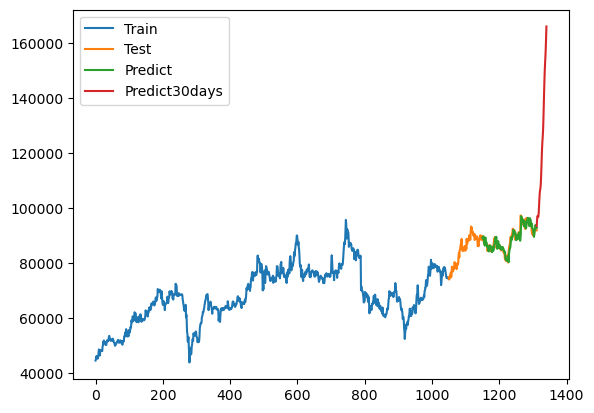

In [99]:
forcast_30Day_8()

93
0 day input [0.6914446  0.6914446  0.70827489 0.72697522 0.72510519 0.72697522
 0.6802244  0.74006545 0.75876578 0.78494624 0.79055633 0.80177653
 0.82047686 0.85226741 0.84852735 0.83730715 0.86161758 0.86161758
 0.87844787 0.88218794 0.91023843 0.89901823 0.88966807 0.88218794
 0.88031791 0.89901823 0.88405797 0.88031791 0.83356709 0.85787751
 0.86722768 0.86161758 0.85226741 0.86161758 0.85974755 0.85413745
 0.86535764 0.885928   0.88405797 0.85226741 0.84104722 0.85226741
 0.88218794 1.         0.99812997 0.99812997 0.97381954 0.96446938
 0.96633941 0.97007948 0.95698925 0.93828892 0.94389902 0.97381954
 0.95511921 0.93641889 0.91771856 0.9083684  0.92145863 0.95885928
 0.98129967 0.96820944 0.97942964 0.97007948 0.96820944 0.95324918
 0.95885928 0.94576905 0.93267882 0.97381954 0.95324918 0.95324918
 0.94202899 0.94576905 0.93641889 0.94763908 0.89901823 0.88031791
 0.87096774 0.87096774 0.87283777 0.86348761 0.87283777 0.88031791
 0.88405797 0.8971482  0.9083684  0.91771856 0.

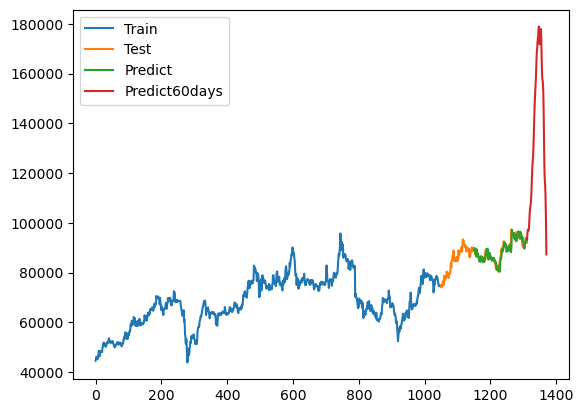

In [100]:
forcast_60Day_8()

93
0 day input [0.6914446  0.6914446  0.70827489 0.72697522 0.72510519 0.72697522
 0.6802244  0.74006545 0.75876578 0.78494624 0.79055633 0.80177653
 0.82047686 0.85226741 0.84852735 0.83730715 0.86161758 0.86161758
 0.87844787 0.88218794 0.91023843 0.89901823 0.88966807 0.88218794
 0.88031791 0.89901823 0.88405797 0.88031791 0.83356709 0.85787751
 0.86722768 0.86161758 0.85226741 0.86161758 0.85974755 0.85413745
 0.86535764 0.885928   0.88405797 0.85226741 0.84104722 0.85226741
 0.88218794 1.         0.99812997 0.99812997 0.97381954 0.96446938
 0.96633941 0.97007948 0.95698925 0.93828892 0.94389902 0.97381954
 0.95511921 0.93641889 0.91771856 0.9083684  0.92145863 0.95885928
 0.98129967 0.96820944 0.97942964 0.97007948 0.96820944 0.95324918
 0.95885928 0.94576905 0.93267882 0.97381954 0.95324918 0.95324918
 0.94202899 0.94576905 0.93641889 0.94763908 0.89901823 0.88031791
 0.87096774 0.87096774 0.87283777 0.86348761 0.87283777 0.88031791
 0.88405797 0.8971482  0.9083684  0.91771856 0.

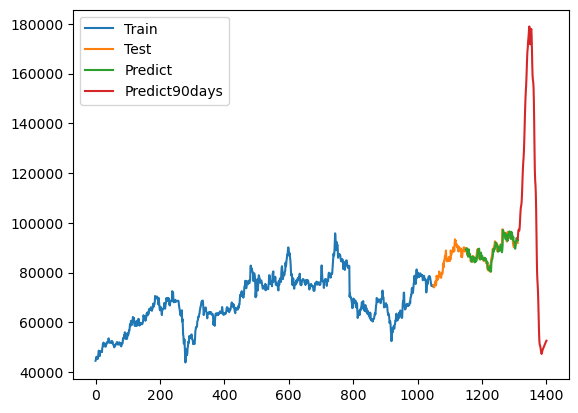

In [101]:
forcast_90Day_8()

VCB 7:3

In [102]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1) + 1)

train_data = df1[:train_size]
test_data = df1[train_size:]
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [103]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 5.6053e-04
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 6.0366e-04
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 5.0733e-04
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 5.5979e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 5.9288e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 5.4858e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 5.5327e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 5.5659e-04
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 6.5290e-04
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 5.5182e-04
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 5.9630e-04
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 5.7457e-04
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 6.4588e-04
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 5.1318e-0

In [104]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [105]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 85826.6916231094


94
0 day input [0.69518467 0.6914446  0.6914446  0.70827489 0.72697522 0.72510519
 0.72697522 0.6802244  0.74006545 0.75876578 0.78494624 0.79055633
 0.80177653 0.82047686 0.85226741 0.84852735 0.83730715 0.86161758
 0.86161758 0.87844787 0.88218794 0.91023843 0.89901823 0.88966807
 0.88218794 0.88031791 0.89901823 0.88405797 0.88031791 0.83356709
 0.85787751 0.86722768 0.86161758 0.85226741 0.86161758 0.85974755
 0.85413745 0.86535764 0.885928   0.88405797 0.85226741 0.84104722
 0.85226741 0.88218794 1.         0.99812997 0.99812997 0.97381954
 0.96446938 0.96633941 0.97007948 0.95698925 0.93828892 0.94389902
 0.97381954 0.95511921 0.93641889 0.91771856 0.9083684  0.92145863
 0.95885928 0.98129967 0.96820944 0.97942964 0.97007948 0.96820944
 0.95324918 0.95885928 0.94576905 0.93267882 0.97381954 0.95324918
 0.95324918 0.94202899 0.94576905 0.93641889 0.94763908 0.89901823
 0.88031791 0.87096774 0.87096774 0.87283777 0.86348761 0.87283777
 0.88031791 0.88405797 0.8971482  0.9083684  0.

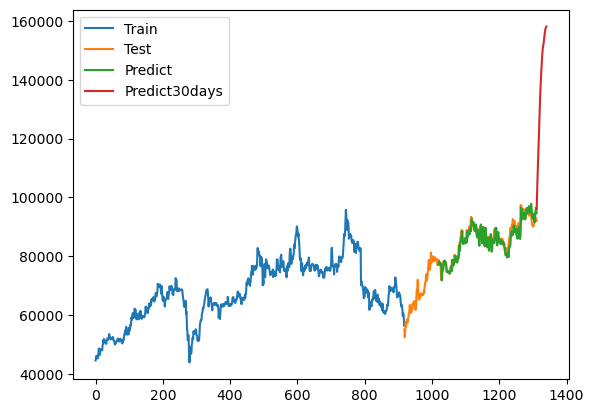

In [106]:
forcast_30Day_7()

94
0 day input [0.69518467 0.6914446  0.6914446  0.70827489 0.72697522 0.72510519
 0.72697522 0.6802244  0.74006545 0.75876578 0.78494624 0.79055633
 0.80177653 0.82047686 0.85226741 0.84852735 0.83730715 0.86161758
 0.86161758 0.87844787 0.88218794 0.91023843 0.89901823 0.88966807
 0.88218794 0.88031791 0.89901823 0.88405797 0.88031791 0.83356709
 0.85787751 0.86722768 0.86161758 0.85226741 0.86161758 0.85974755
 0.85413745 0.86535764 0.885928   0.88405797 0.85226741 0.84104722
 0.85226741 0.88218794 1.         0.99812997 0.99812997 0.97381954
 0.96446938 0.96633941 0.97007948 0.95698925 0.93828892 0.94389902
 0.97381954 0.95511921 0.93641889 0.91771856 0.9083684  0.92145863
 0.95885928 0.98129967 0.96820944 0.97942964 0.97007948 0.96820944
 0.95324918 0.95885928 0.94576905 0.93267882 0.97381954 0.95324918
 0.95324918 0.94202899 0.94576905 0.93641889 0.94763908 0.89901823
 0.88031791 0.87096774 0.87096774 0.87283777 0.86348761 0.87283777
 0.88031791 0.88405797 0.8971482  0.9083684  0.

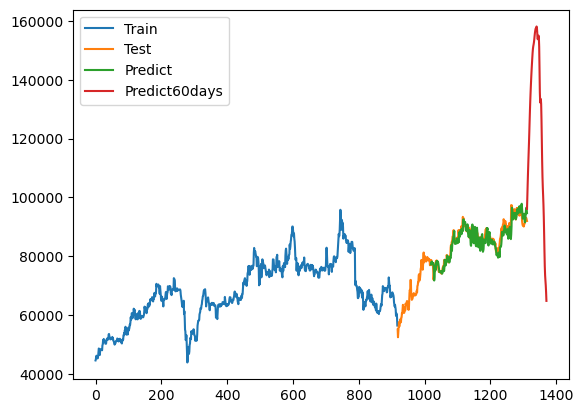

In [107]:
forcast_60Day_7()

94
0 day input [0.69518467 0.6914446  0.6914446  0.70827489 0.72697522 0.72510519
 0.72697522 0.6802244  0.74006545 0.75876578 0.78494624 0.79055633
 0.80177653 0.82047686 0.85226741 0.84852735 0.83730715 0.86161758
 0.86161758 0.87844787 0.88218794 0.91023843 0.89901823 0.88966807
 0.88218794 0.88031791 0.89901823 0.88405797 0.88031791 0.83356709
 0.85787751 0.86722768 0.86161758 0.85226741 0.86161758 0.85974755
 0.85413745 0.86535764 0.885928   0.88405797 0.85226741 0.84104722
 0.85226741 0.88218794 1.         0.99812997 0.99812997 0.97381954
 0.96446938 0.96633941 0.97007948 0.95698925 0.93828892 0.94389902
 0.97381954 0.95511921 0.93641889 0.91771856 0.9083684  0.92145863
 0.95885928 0.98129967 0.96820944 0.97942964 0.97007948 0.96820944
 0.95324918 0.95885928 0.94576905 0.93267882 0.97381954 0.95324918
 0.95324918 0.94202899 0.94576905 0.93641889 0.94763908 0.89901823
 0.88031791 0.87096774 0.87096774 0.87283777 0.86348761 0.87283777
 0.88031791 0.88405797 0.8971482  0.9083684  0.

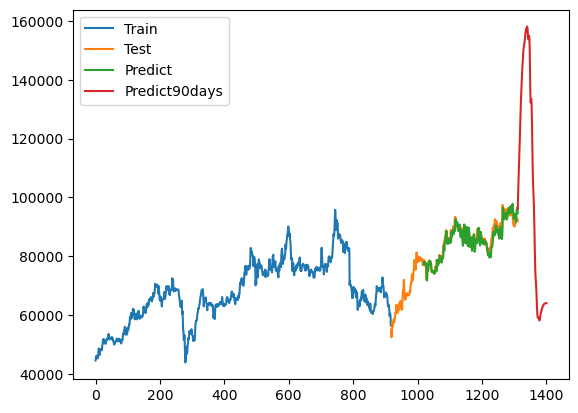

In [108]:
forcast_90Day_7()